__9. Write a program to read the data from the following link, perform data analysis and answer the following
questions__

__Note -__
__1. Write code comments wherever required for code understanding__

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

__Insights to be drawn -__
* Get all the cars and their types that do not qualify for clean alternative fuel vehicle
* Get all TESLA cars with the model year, and model type made in Bothell City.
* Get all the cars that have an electric range of more than 100, and were made after 2015
* Draw plots to show the distribution between city and electric vehicle type__

Cars that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []

TESLA cars made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []

Cars with electric range > 100 km made after 2015:
          Make    Model  Electric Range
0        TESLA  MODEL X             238
2        TESLA  MODEL 3             220
4        TESLA  MODEL S             210
12       TESLA  MODEL 3             308
13       TESLA  MODEL 3             322
...        ...      ...             ...
130417   TESLA  MODEL Y             291
130428  NISSAN     LEAF             151
130432   TESLA  MODEL Y             291
130436   TESLA  MODEL 3             215
130441   TESLA  MODEL X             293

[34066 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

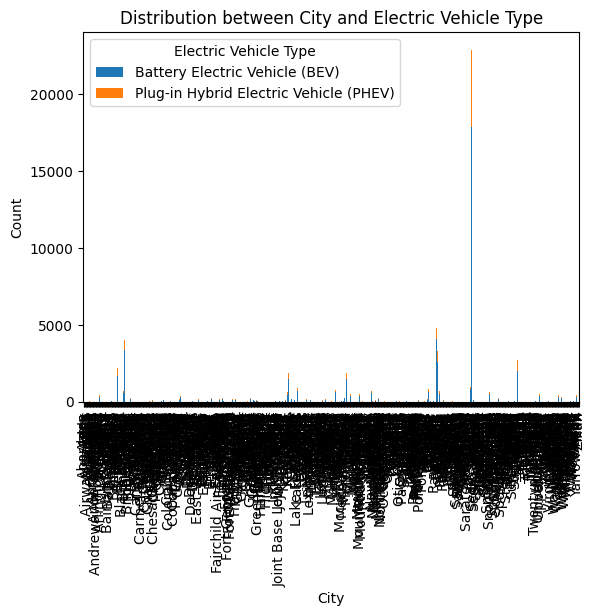

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
not_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'N'][['Make', 'Model']]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(not_clean_cars)

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_bothell_cars = df[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL')][['Model Year', 'Model']]
print("\nTESLA cars made in Bothell City:")
print(tesla_bothell_cars)

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_range_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)][['Make', 'Model', 'Electric Range']]
print("\nCars with electric range > 100 km made after 2015:")
print(electric_range_cars)

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(10, 6))
df.groupby(['City', 'Electric Vehicle Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution between City and Electric Vehicle Type')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.show()
